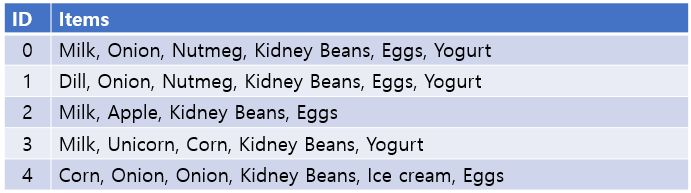

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [ ]:
# 품목명으로 된 데이터를 True/False 데이터로 바꿔주는 클래스
from mlxtend.preprocessing import TransactionEncoder 
# http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/#api
te = TransactionEncoder()
te.fit(dataset) # dataset에 어떤 품목 있는지 계산
te_ary = te.transform(dataset) # 실제 변환
te_ary

In [ ]:
import pandas as pd
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
pd.DataFrame(te_ary)

In [ ]:
df = pd.DataFrame(data = te_ary, columns = te.columns_) # 컬럼명을 넣어 데이터 프레임화
df

In [ ]:
from mlxtend.frequent_patterns import apriori
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

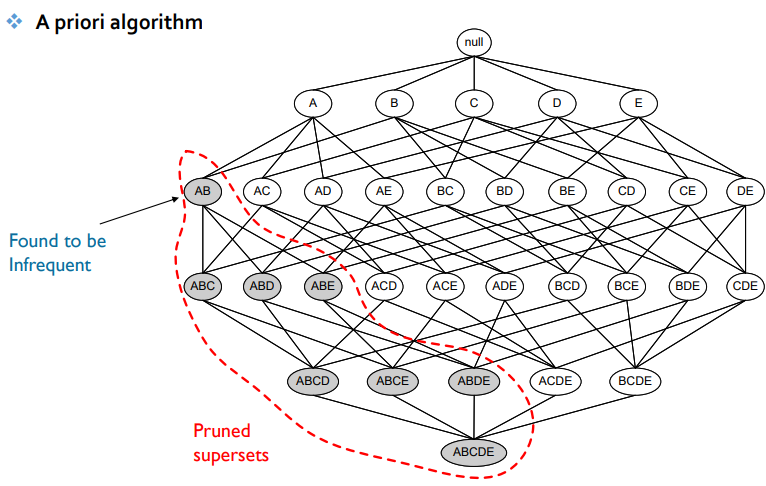

In [ ]:
frequent_itemsets = apriori(df = df, min_support=0.2, use_colnames=True) # support 0.2 이상인 변수 조합 greedy하게 탐색
frequent_itemsets

In [ ]:
from itertools import combinations
lists = frequent_itemsets['itemsets'].values
a = list(combinations(lists, 2))
len(a)

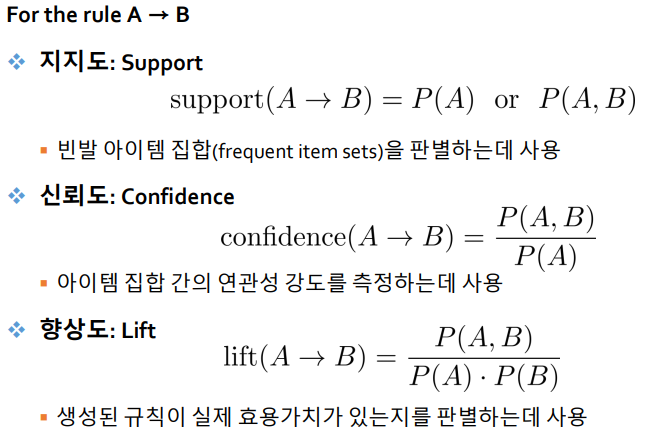

In [ ]:
from mlxtend.frequent_patterns import association_rules
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7) # threshold 값을 기준으로 연관도가 높은 품목 조합 산출 후 표로 return
rules

In [ ]:
rules[rules['antecedents']==('Corn', 'Eggs')].sort_values('lift', ascending = False)

In [ ]:
rules.iloc[0,0]

In [ ]:
rules[rules['antecedents']==frozenset(('Eggs', 'Onion', 'Milk'))].sort_values('lift', ascending = False) # 결과표에서 원하는 조합을 탐색하려면 frozenset 형식으로 변환해 검색

In [ ]:
# support(지지도) P(A∩B)
# confiddence(신뢰도) P(A∩B) / P(A)
# lift(향상도) P(A∩B) / P(A)*P(B) (A, B가 독립인 경우 1)